<a href="https://colab.research.google.com/github/yev34/Machine-learning/blob/main/Patalashko_lab4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#1. Перегляньте перші кілька рядків.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
#2. Перевірте назви стовпців та типи даних.

print("Назви стовпців:\n", df.columns)

print("\nТипи даних:\n", df.dtypes)

Назви стовпців:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Типи даних:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmet

In [3]:
#3. Перевірте наявність пропущених значень.

print("\nКількість пропущених значень у кожному стовпці:\n", df.isnull().sum())


Кількість пропущених значень у кожному стовпці:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
#4. Досліджуйте розмір даних.

print("Розмір даних:\n", df.shape)

Розмір даних:
 (569, 31)


In [5]:
#1. Розділіть дані на навчальний і тестовий набори.

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 455
Розмір тестової вибірки: 114


In [6]:
#2. Побудуйте три моделі класифікації: Логістична регресія, Дерево рішень,
# Випадковий ліс (Random Forest).
#3. Підберіть оптимальні параметри для кожної моделі за допомогою GridSearchCV

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

best_models = {}

for name, model in models.items():
    print(f"\nОптимізація параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")


Оптимізація параметрів для Logistic Regression...
Найкращі параметри для Logistic Regression: {'C': 100, 'solver': 'lbfgs'}

Оптимізація параметрів для Decision Tree...
Найкращі параметри для Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}

Оптимізація параметрів для Random Forest...
Найкращі параметри для Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}



Оцінка моделі: Logistic Regression
Точність (Accuracy): 0.96
Матриця помилок (Confusion Matrix):
[[39  4]
 [ 1 70]]


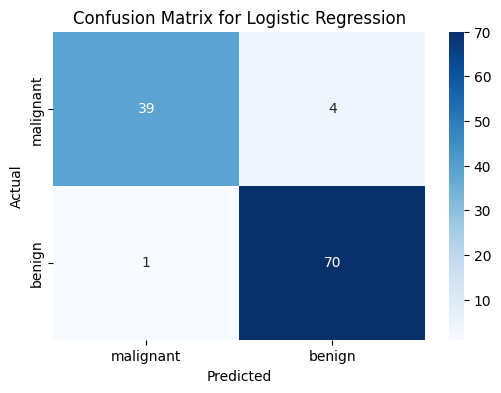


Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Оцінка моделі: Decision Tree
Точність (Accuracy): 0.96
Матриця помилок (Confusion Matrix):
[[39  4]
 [ 1 70]]


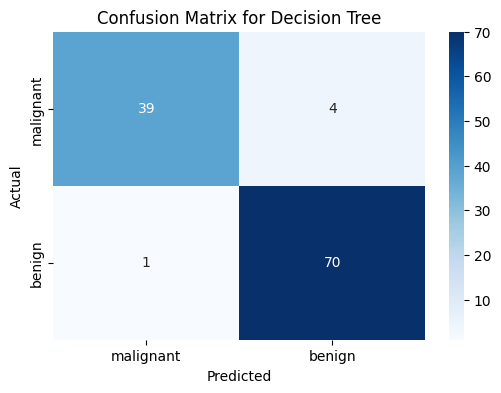


Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Оцінка моделі: Random Forest
Точність (Accuracy): 0.96
Матриця помилок (Confusion Matrix):
[[40  3]
 [ 1 70]]


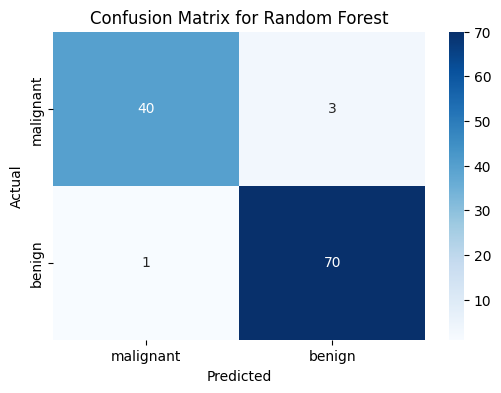


Звіт про класифікацію (Classification Report):
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
#3. Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю
# помилок (confusion matrix) – за вибором та звіт про класифікацію
# (classification report) для кожної моделі.

for name, model in best_models.items():
    print(f"\nОцінка моделі: {name}")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точність (Accuracy): {accuracy:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    print("Матриця помилок (Confusion Matrix):")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    report = classification_report(y_test, y_pred, target_names=data.target_names)
    print("\nЗвіт про класифікацію (Classification Report):")
    print(report)


Результати прогнозування для моделі Random Forest:
     Фактичні значення  Прогнозовані значення
204                  1                      1
70                   0                      0
131                  0                      0
431                  1                      1
540                  1                      1
567                  0                      0
369                  0                      0
29                   0                      0
81                   1                      0
477                  1                      1

Точність найкращої моделі (Random Forest): 0.96

Матриця помилок:
[[40  3]
 [ 1 70]]

Звіт про класифікацію:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



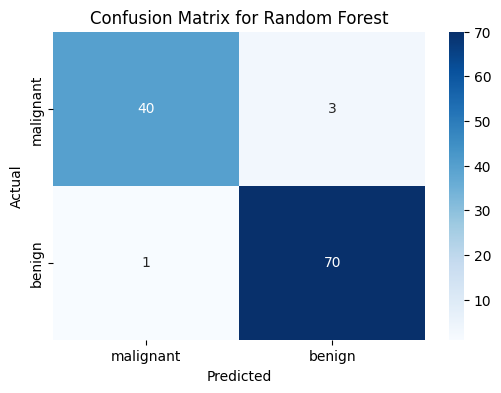

In [8]:
#4. Прогнозування і висновки
#1. Оберіть найкращу модель на основі метрик продуктивності.
#2. Зробіть прогноз на тестовій вибірці.
#3. Виведіть результати прогнозування.

best_model = best_models['Random Forest']

y_pred_best = best_model.predict(X_test)

results = pd.DataFrame({'Фактичні значення': y_test, 'Прогнозовані значення': y_pred_best})
print("Результати прогнозування для моделі Random Forest:")
print(results.head(10))  # Вивести перші 10 результатів

accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nТочність найкращої моделі (Random Forest): {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best, target_names=data.target_names)

print("\nМатриця помилок:")
print(cm)

print("\nЗвіт про класифікацію:")
print(report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Висновок:** Модель випадкового лісу продемонструвала найвищі результати за показниками точності, precision, recall та F1-score. Тому вона є найбільш ефективною для прогнозування на даному наборі даних про рак молочної залози.